In [2]:
!pip3 install --upgrade mxnet-cu101 gluoncv

     |████████████████████████████████| 358.1 MB 5.0 kB/s 
     |████████████████████████████████| 1.3 MB 44.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
from mxnet.gluon.model_zoo import vision as models
from mxnet.gluon.utils import download
from mxnet import image

net = models.resnet50_v2(pretrained=True)

In [4]:
url = 'http://data.mxnet.io/models/imagenet/synset.txt'
fname = download(url)
with open(fname, 'r') as f:
    text_labels = [' '.join(l.split()[1:]) for l in f]

In [7]:
from gluoncv import model_zoo, data, utils

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [11]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

223070KB [00:08, 25782.54KB/s]                            


In [15]:
import matplotlib.pyplot as plt


In [18]:
im_fname = utils.download('https://github.com/Vineeth08/Model-Zoo/blob/main/biking-with-dog-1208975567-2000.jpg?raw=true')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

100%|██████████| 415/415 [00:00<00:00, 10606.46KB/s]

Shape of pre-processed image: (1, 3, 512, 768)


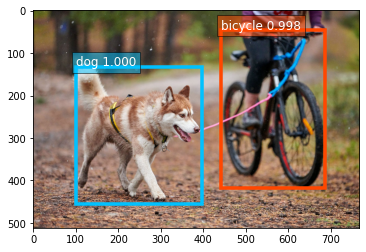

In [19]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()